In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats 
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from scipy.stats import zscore

### The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team. We have to segment type of ads based on the features provided using clustering technique

### Basic Exploratory Data Analaysis

In [2]:
data = pd.read_excel("Clustering Clean Ads_Data.xlsx")

In [3]:
data.head().T

,0,1,2,3,4
Timestamp,2020-9-2-17,2020-9-2-10,2020-9-1-22,2020-9-3-20,2020-9-4-15
InventoryType,Format1,Format1,Format1,Format1,Format1
Ad - Length,300,300,300,300,300
Ad- Width,250,250,250,250,250
Ad Size,75000,75000,75000,75000,75000
Ad Type,Inter222,Inter227,Inter222,Inter228,Inter217
Platform,Video,App,Video,Video,Web
Device Type,Desktop,Mobile,Desktop,Mobile,Desktop
Format,Display,Video,Display,Video,Video
Available_Impressions,1806,1780,2727,2430,1218


In [4]:
data.tail().T

,23061,23062,23063,23064,23065
Timestamp,2020-9-13-7,2020-11-2-7,2020-9-14-22,2020-11-18-2,2020-9-14-0
InventoryType,Format5,Format5,Format5,Format4,Format5
Ad - Length,720,720,720,120,720
Ad- Width,300,300,300,600,300
Ad Size,216000,216000,216000,72000,216000
Ad Type,Inter220,Inter224,Inter218,inter230,Inter221
Platform,Web,Web,App,Video,App
Device Type,Mobile,Desktop,Mobile,Mobile,Mobile
Format,Video,Video,Video,Video,Video
Available_Impressions,1,3,2,7,2


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


In [6]:
data.dtypes

Timestamp                 object
InventoryType             object
Ad - Length                int64
Ad- Width                  int64
Ad Size                    int64
Ad Type                   object
Platform                  object
Device Type               object
Format                    object
Available_Impressions      int64
Matched_Queries            int64
Impressions                int64
Clicks                     int64
Spend                    float64
Fee                      float64
Revenue                  float64
CTR                      float64
CPM                      float64
CPC                      float64
dtype: object

In [7]:
data.shape

(23066, 19)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [9]:
data.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [10]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


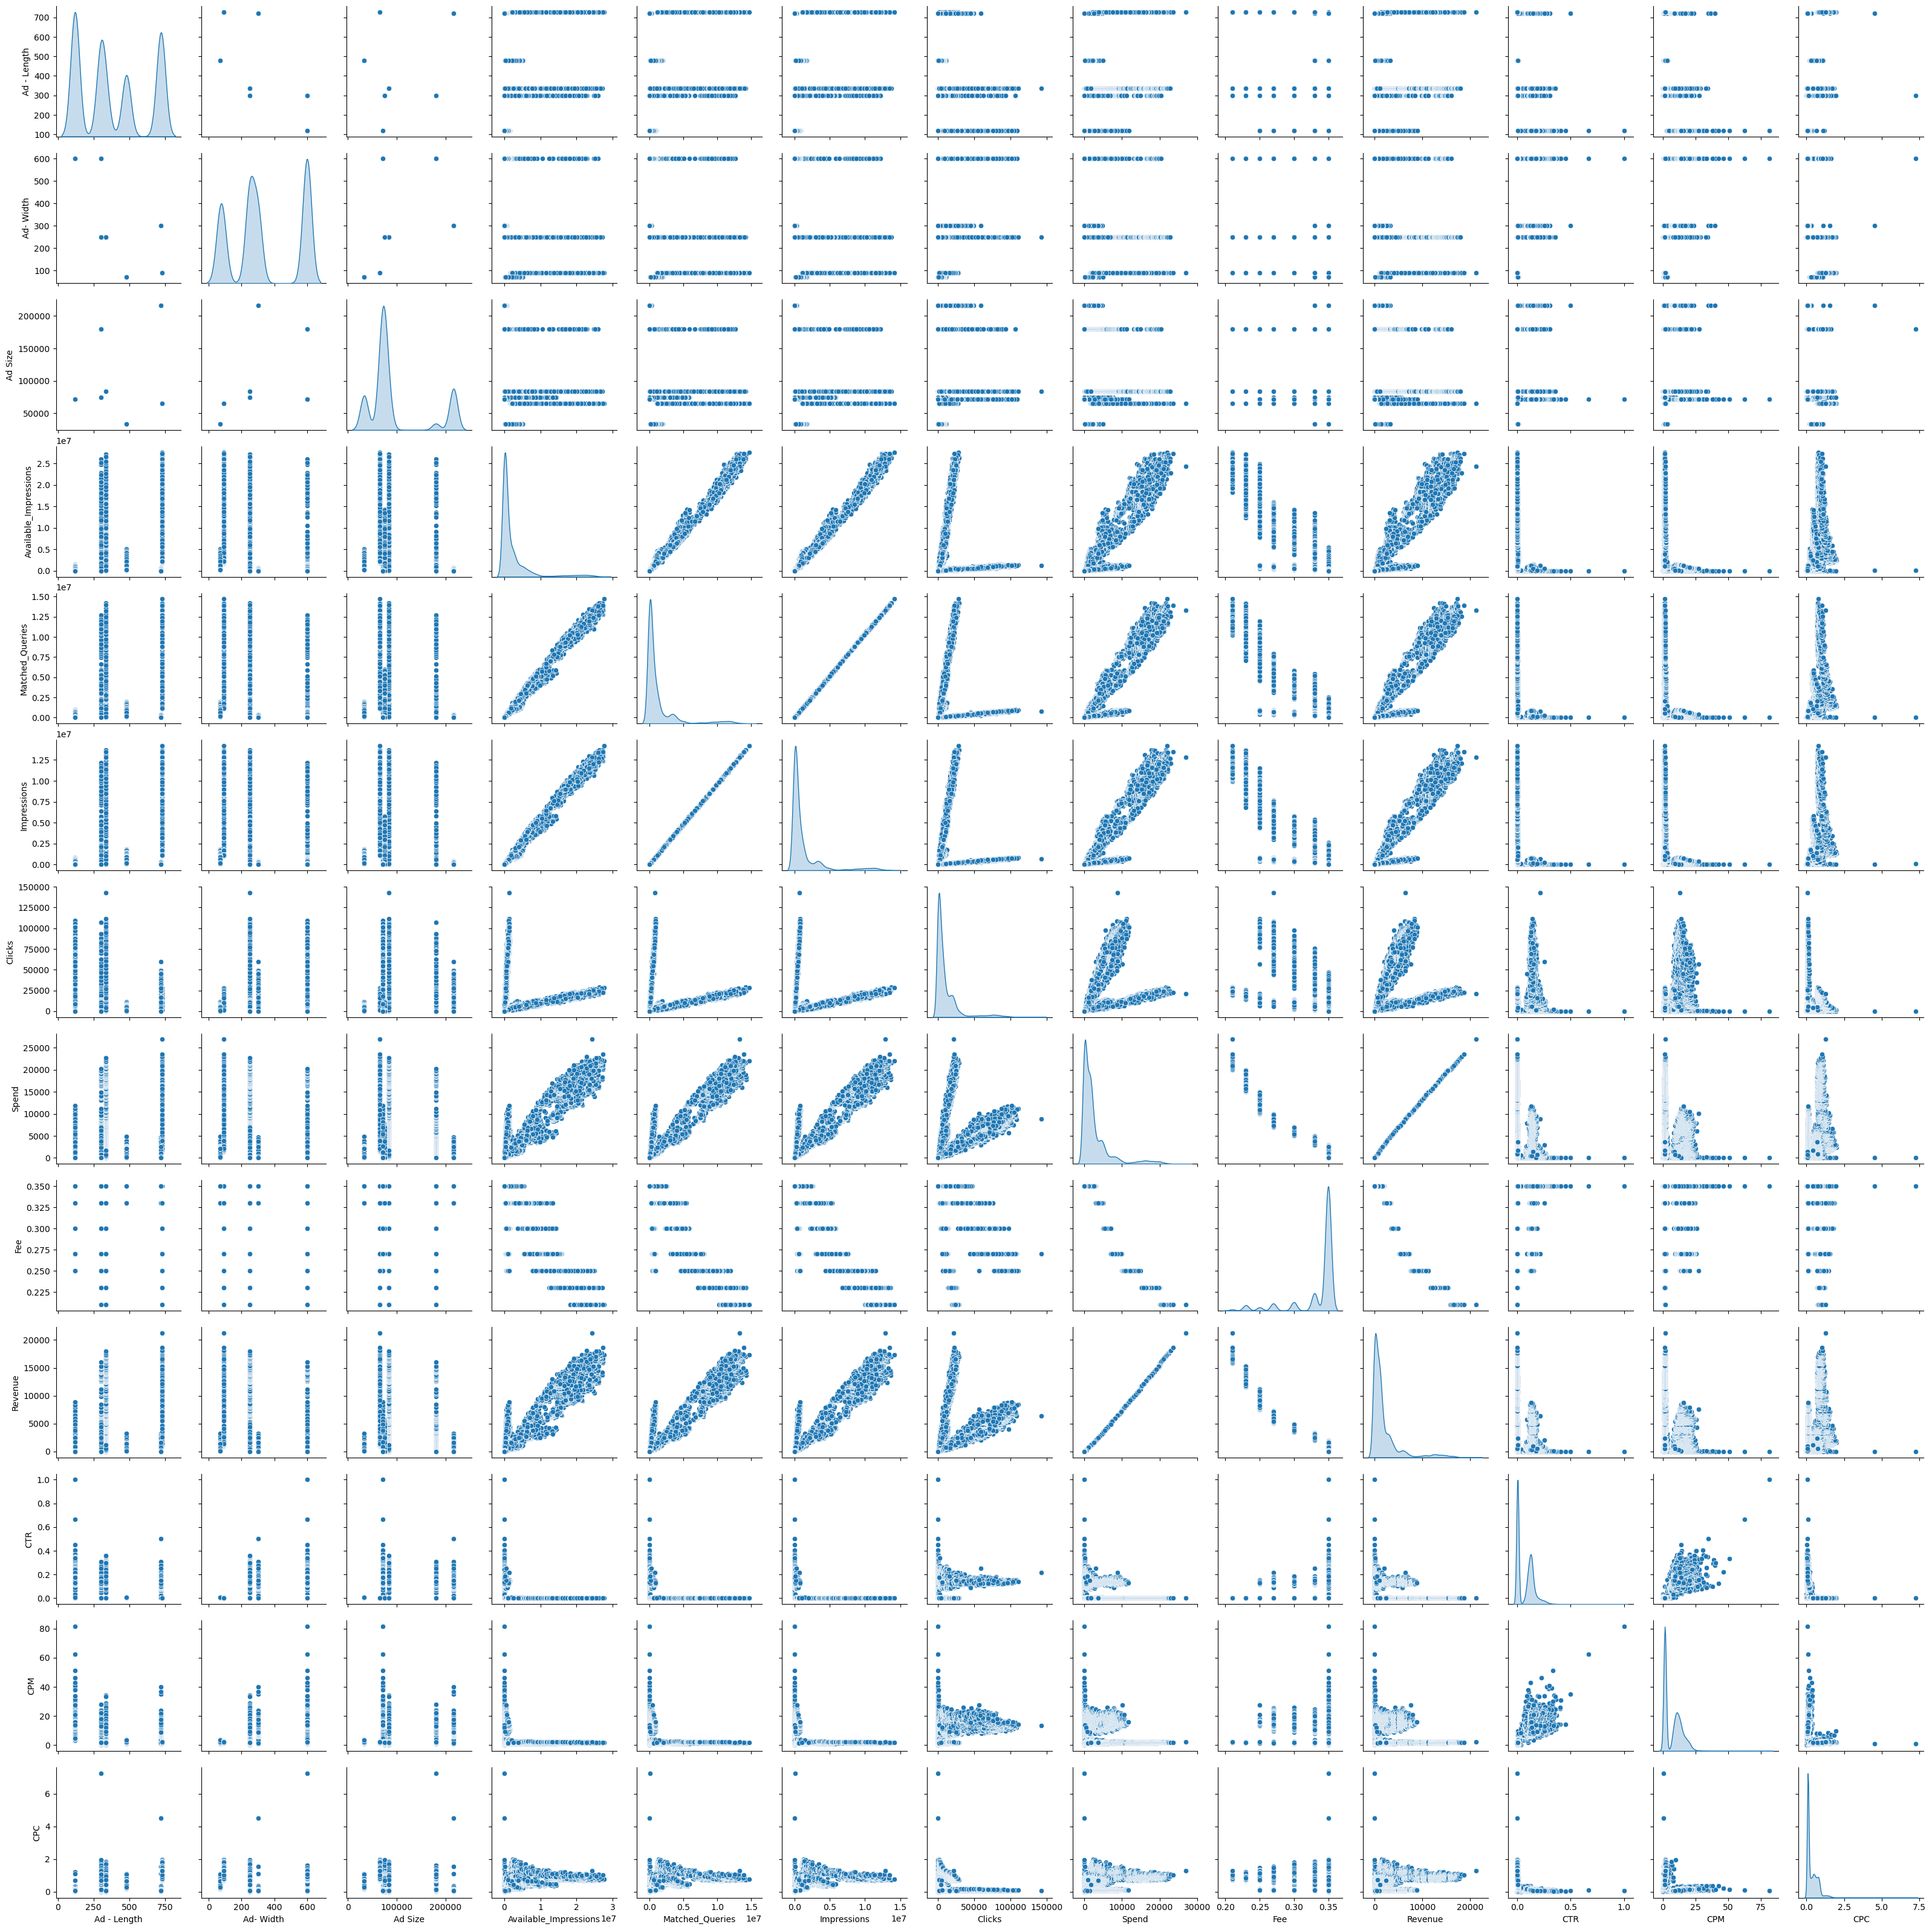

In [11]:
sns.pairplot(data,diag_kind='kde');

### Treating Missing Values

In [12]:
def calculate_cpm(x):
    Spend=data.Spend
    Impressions=data.Impressions
    cpm = (Spend/Impressions)*1000
    return cpm

In [13]:
def calculate_cpc(x):
    spend=data.Spend
    clicks = data.Clicks
    cpc = (spend/clicks)
    return cpc

In [14]:
def calculate_ctr(x):
    clicks = data.Clicks
    impressions=data.Impressions
    ctr = (clicks/impressions)*100
    return ctr

In [15]:
data['CTR'] = data[['CTR']].apply(lambda x: calculate_ctr(x))
data['CPM'] = data[['CPM']].apply(lambda x: calculate_cpm(x))
data['CPC'] = data[['CPC']].apply(lambda x: calculate_cpc(x))

In [16]:
data.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

### outliers

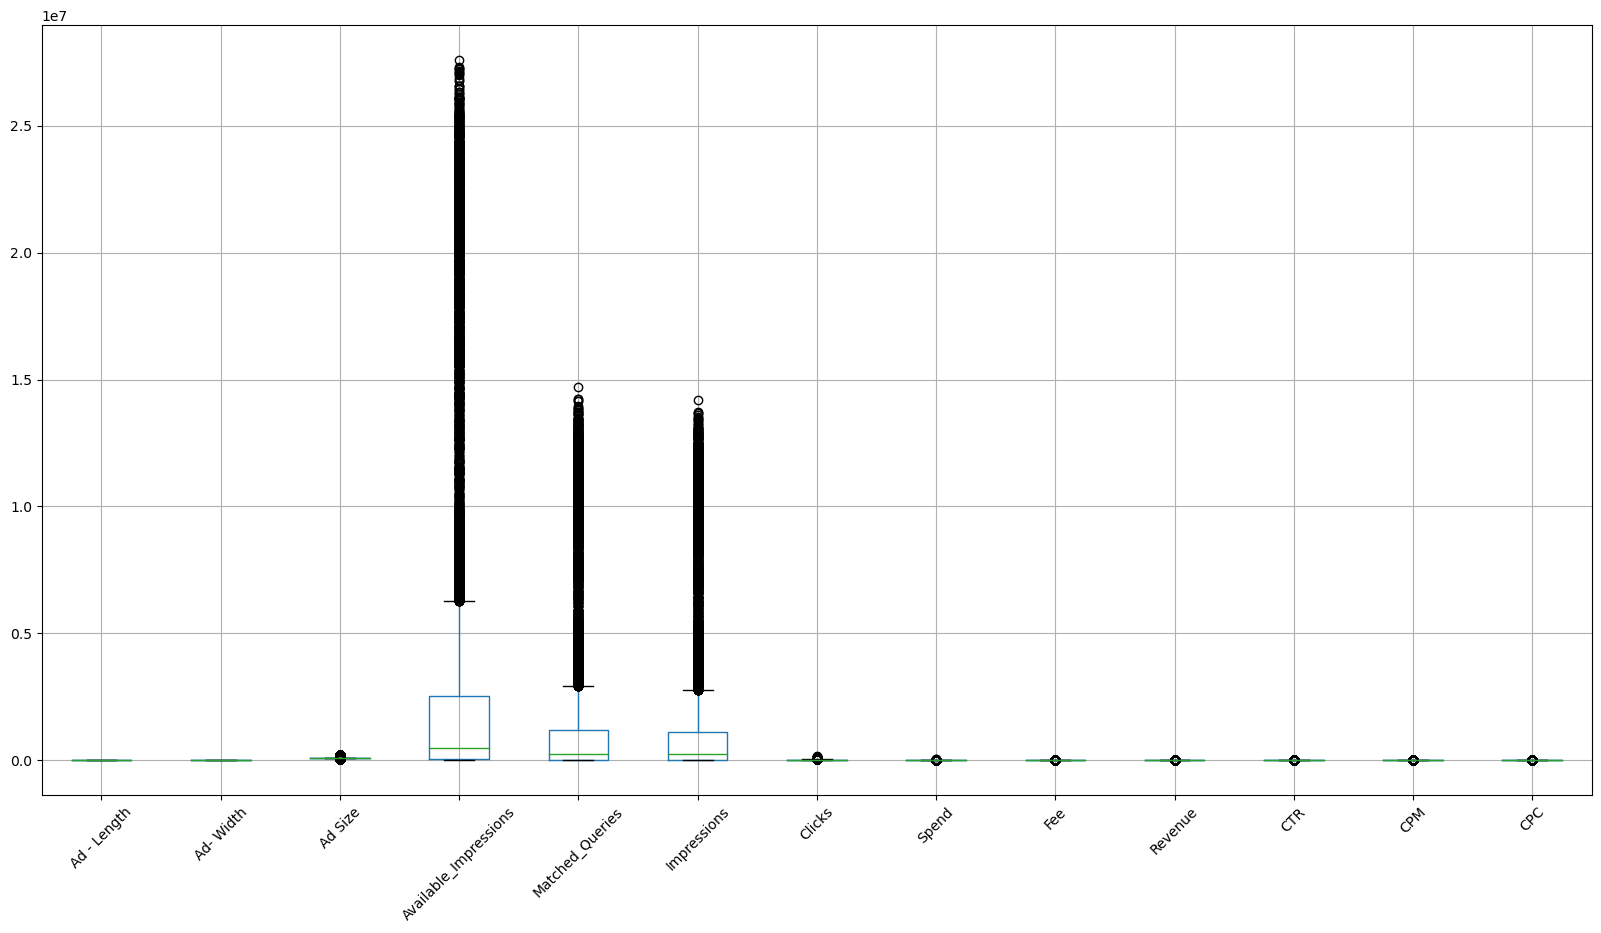

In [17]:
data.boxplot(figsize=(20,10),rot=45)
plt.show()

In [18]:
data_num= data.select_dtypes(include=['float64','int64'])

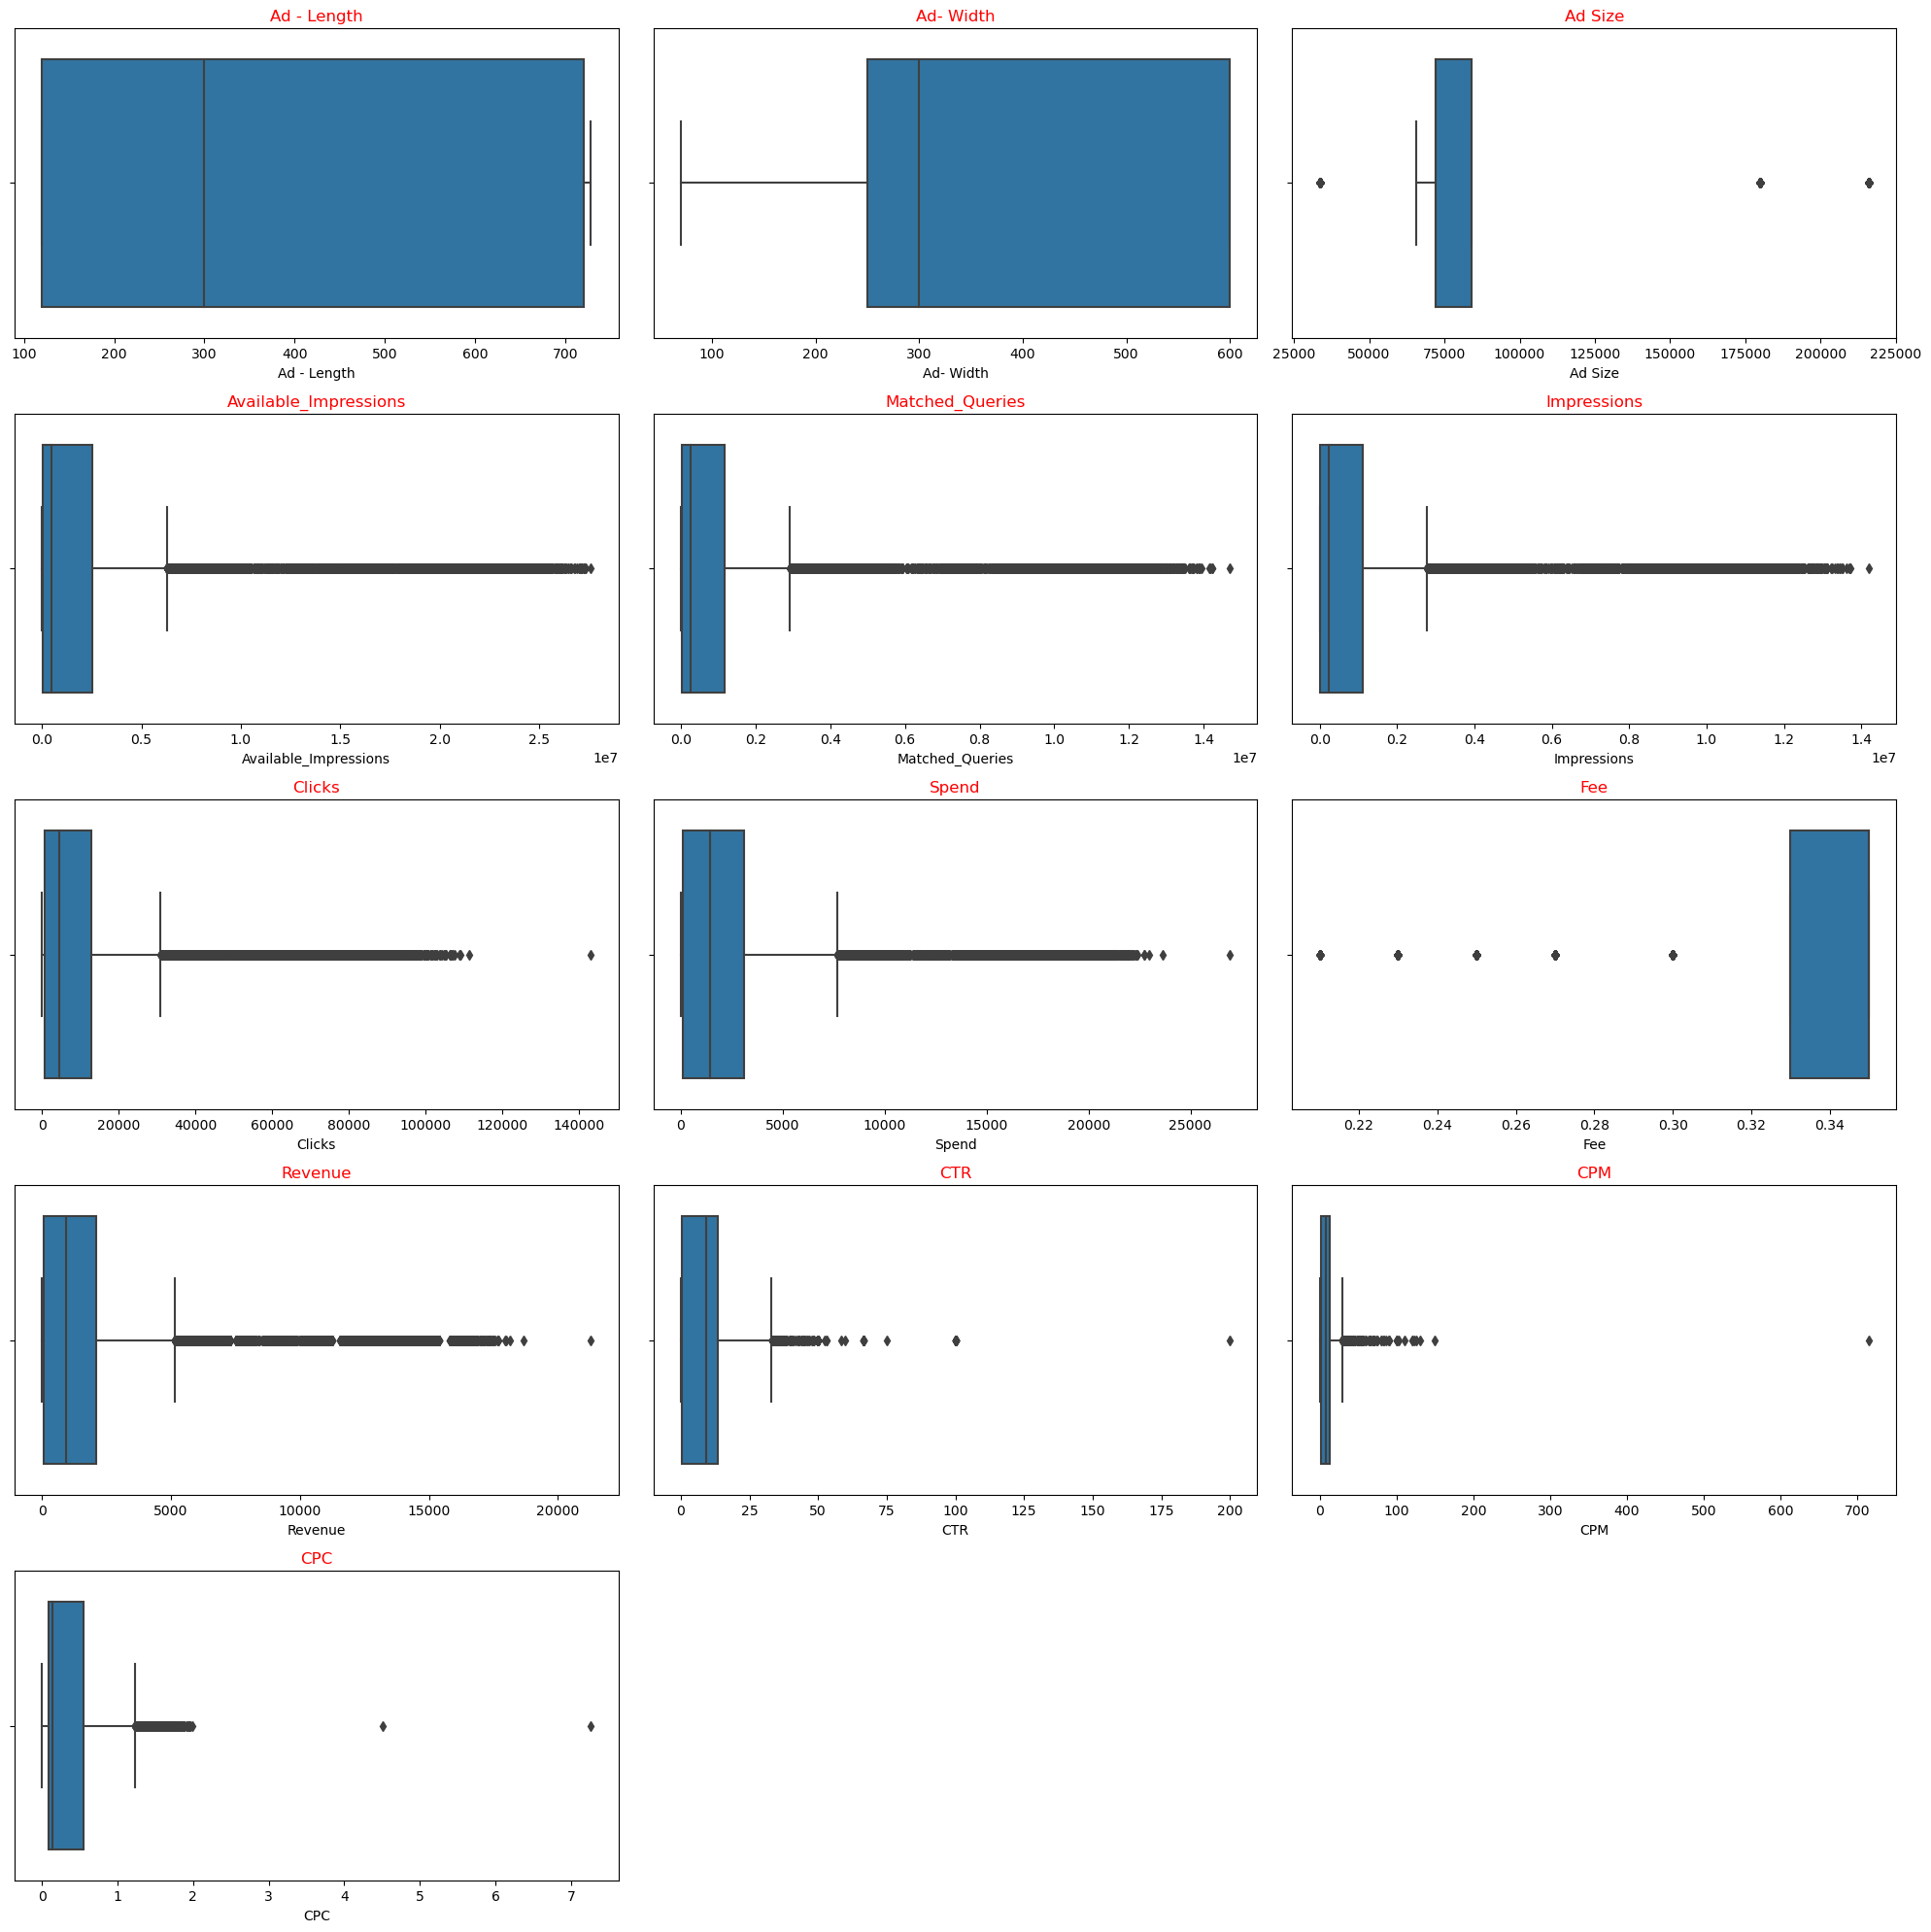

In [19]:
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)
data_plot = data_num
fig = plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax = fig.add_subplot(5,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

In [20]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    Q5 = np.percentile(x,5)
    Q25 = np.percentile(x,25)
    Q75 = np.percentile(x,75)
    Q95 = np.percentile(x,95)
    
    #calculationg IQR range
    IQR = Q75-Q25
    
    #Calculating minimum threshold
    lower_bound = Q25-(1.5*IQR)
    upper_bound = Q75+(1.5*IQR)
    
    #Capping outliers
    return x.apply(lambda y: Q5 if y < lower_bound else y).apply(lambda y: Q95 if y > upper_bound else y)

In [21]:
def print_outlier(x):
    
    # taking 5,25,75 percentile of column
    Q5 = np.percentile(x,5)
    Q25 = np.percentile(x,25)
    Q75 = np.percentile(x,75)
    Q95 = np.percentile(x,95)
    min_val = min(x)
    max_val = max(x)
    
    #calculationg IQR range
    IQR = Q75-Q25
    
    #Calculating minimum threshold
    lower_bound=Q25-(1.5*IQR)
    upper_bound=Q75+(1.5*IQR)
    
    #Capping outliers
    return ('5%=',Q5,'Q1=',Q25,'Q3=',Q75,'IQR=',IQR,'LL=',lower_bound,'UL=', upper_bound, '95%', Q95, 'max=',max_val, 'min=',min_val)

In [22]:
for i in data_num.columns:
    print(i,'=',print_outlier(data_num[i]))

Ad - Length = ('5%=', 120.0, 'Q1=', 120.0, 'Q3=', 720.0, 'IQR=', 600.0, 'LL=', -780.0, 'UL=', 1620.0, '95%', 728.0, 'max=', 728, 'min=', 120)
Ad- Width = ('5%=', 70.0, 'Q1=', 250.0, 'Q3=', 600.0, 'IQR=', 350.0, 'LL=', -275.0, 'UL=', 1125.0, '95%', 600.0, 'max=', 600, 'min=', 70)
Ad Size = ('5%=', 33600.0, 'Q1=', 72000.0, 'Q3=', 84000.0, 'IQR=', 12000.0, 'LL=', 54000.0, 'UL=', 102000.0, '95%', 216000.0, 'max=', 216000, 'min=', 33600)
Available_Impressions = ('5%=', 486.25, 'Q1=', 33672.25, 'Q3=', 2527711.75, 'IQR=', 2494039.5, 'LL=', -3707387.0, 'UL=', 6268771.0, '95%', 14363912.25, 'max=', 27592861, 'min=', 1)
Matched_Queries = ('5%=', 160.25, 'Q1=', 18282.5, 'Q3=', 1180700.0, 'IQR=', 1162417.5, 'LL=', -1725343.75, 'UL=', 2924326.25, '95%', 7803449.0, 'max=', 14702025, 'min=', 1)
Impressions = ('5%=', 149.25, 'Q1=', 7990.5, 'Q3=', 1112428.5, 'IQR=', 1104438.0, 'LL=', -1648666.5, 'UL=', 2769085.5, '95%', 7473380.25, 'max=', 14194774, 'min=', 1)
Clicks = ('5%=', 13.0, 'Q1=', 710.0, 'Q3='

In [23]:
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.000000,120.000000,300.000000,7.200000e+02,7.280000e+02
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.000000,250.000000,300.000000,6.000000e+02,6.000000e+02
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.000000,72000.000000,72000.000000,8.400000e+04,2.160000e+05
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.000000,33672.250000,483771.000000,2.527712e+06,2.759286e+07
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.000000,18282.500000,258087.500000,1.180700e+06,1.470202e+07
Impressions,23066.0,1.241520e+06,2.429400e+06,1.000000,7990.500000,225290.000000,1.112428e+06,1.419477e+07
Clicks,23066.0,1.067852e+04,1.735341e+04,1.000000,710.000000,4425.000000,1.279375e+04,1.430490e+05
Spend,23066.0,2.706626e+03,4.067927e+03,0.000000,85.180000,1425.125000,3.121400e+03,2.693187e+04
Fee,23066.0,3.351231e-01,3.196322e-02,0.210000,0.330000,0.350000,3.500000e-01,3.500000e-01
Revenue,23066.0,1.924252e+03,3.105238e+03,0.000000,55.365375,926.335000,2.091338e+03,2.127618e+04


In [24]:
for i in data_num.columns:    
    data_num[i] = treat_outlier(data_num[i])

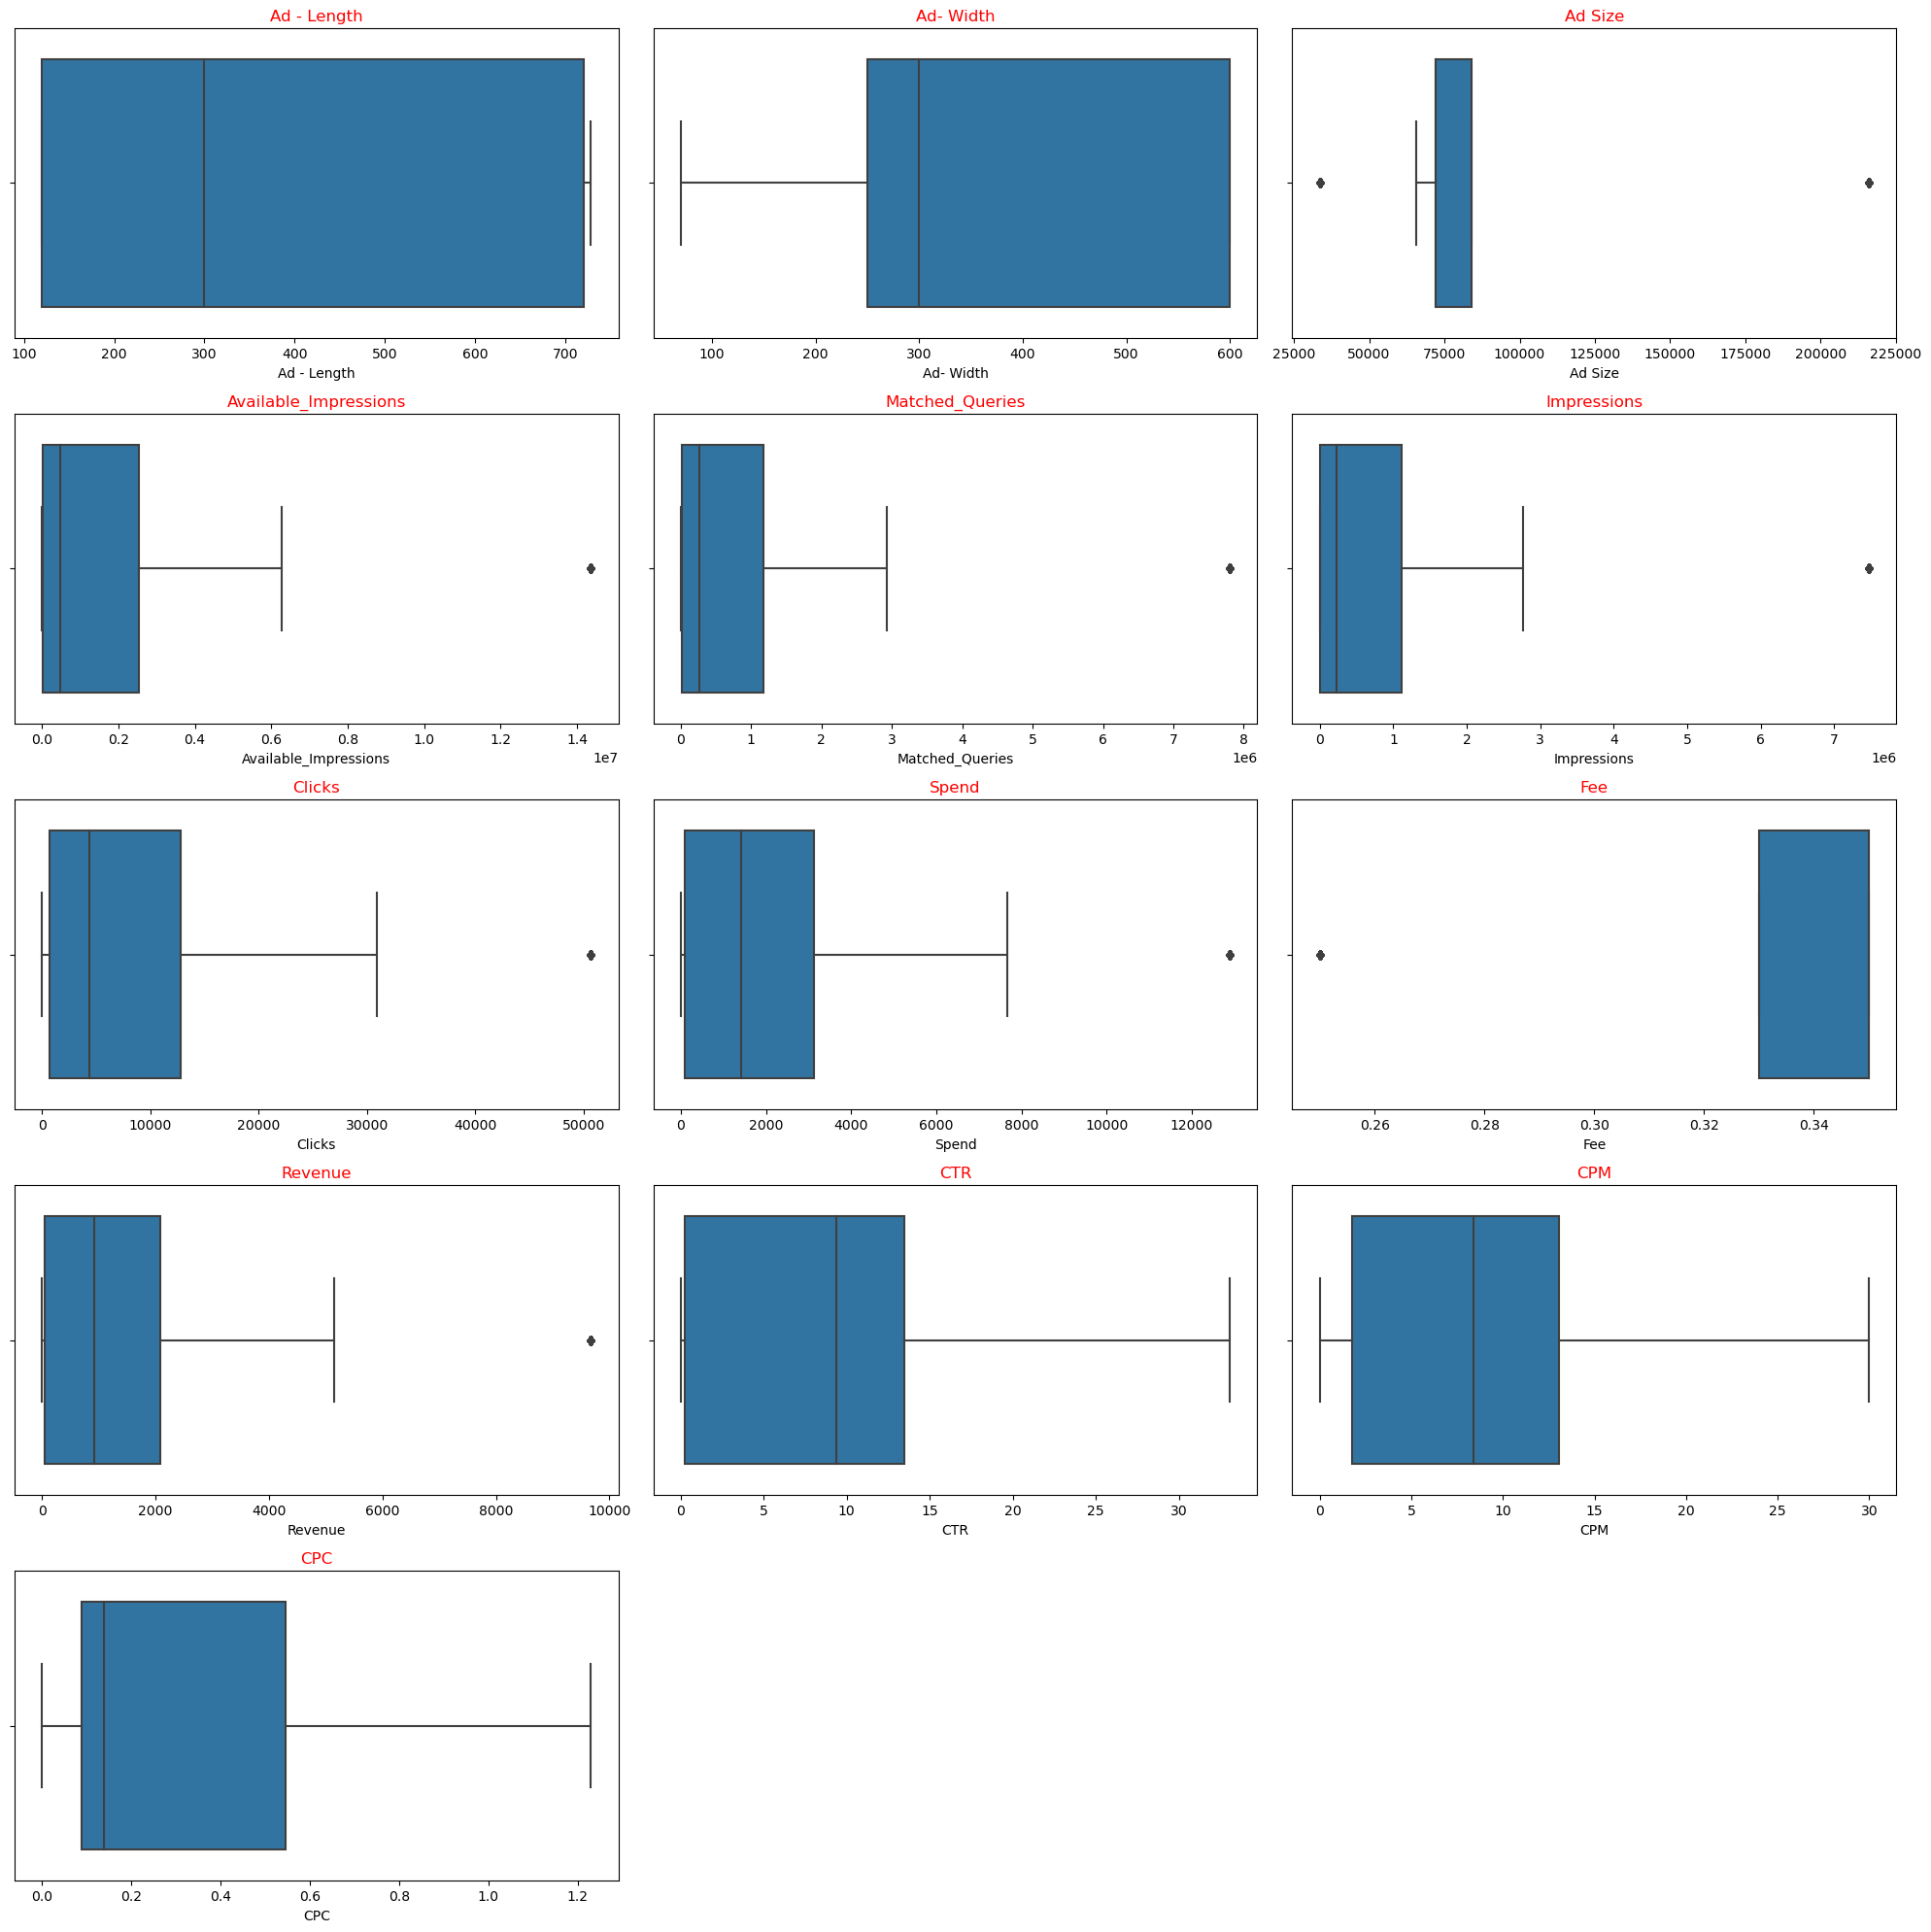

In [25]:
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)
data_plot = data_num
fig = plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax = fig.add_subplot(5,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

### Performing z-score scaling and discussing how it affects the speed of the algorithm.

In [26]:
# Scaling the data using the ZScore Scaling function
from scipy.stats import zscore

#apply the scaler to the data:
data_scaled =  data_num.apply(zscore)
data_scaled.head().T

,0,1,2,3,4
Ad - Length,-0.364496,-0.364496,-0.364496,-0.364496,-0.364496
Ad- Width,-0.432797,-0.432797,-0.432797,-0.432797,-0.432797
Ad Size,-0.359227,-0.359227,-0.359227,-0.359227,-0.359227
Available_Impressions,-0.569484,-0.569490,-0.569269,-0.569339,-0.569622
Matched_Queries,-0.567061,-0.567076,-0.567049,-0.566994,-0.567093
Impressions,-0.563943,-0.563958,-0.563931,-0.563875,-0.563975
Clicks,-0.719779,-0.719779,-0.719779,-0.719779,-0.719779
Spend,-0.722776,-0.722776,-0.722776,-0.722776,-0.722776
Fee,0.487214,0.487214,0.487214,0.487214,0.487214
Revenue,-0.676118,-0.676118,-0.676118,-0.676118,-0.676118


### Performing Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

In [27]:
import scipy.cluster.hierarchy as shc

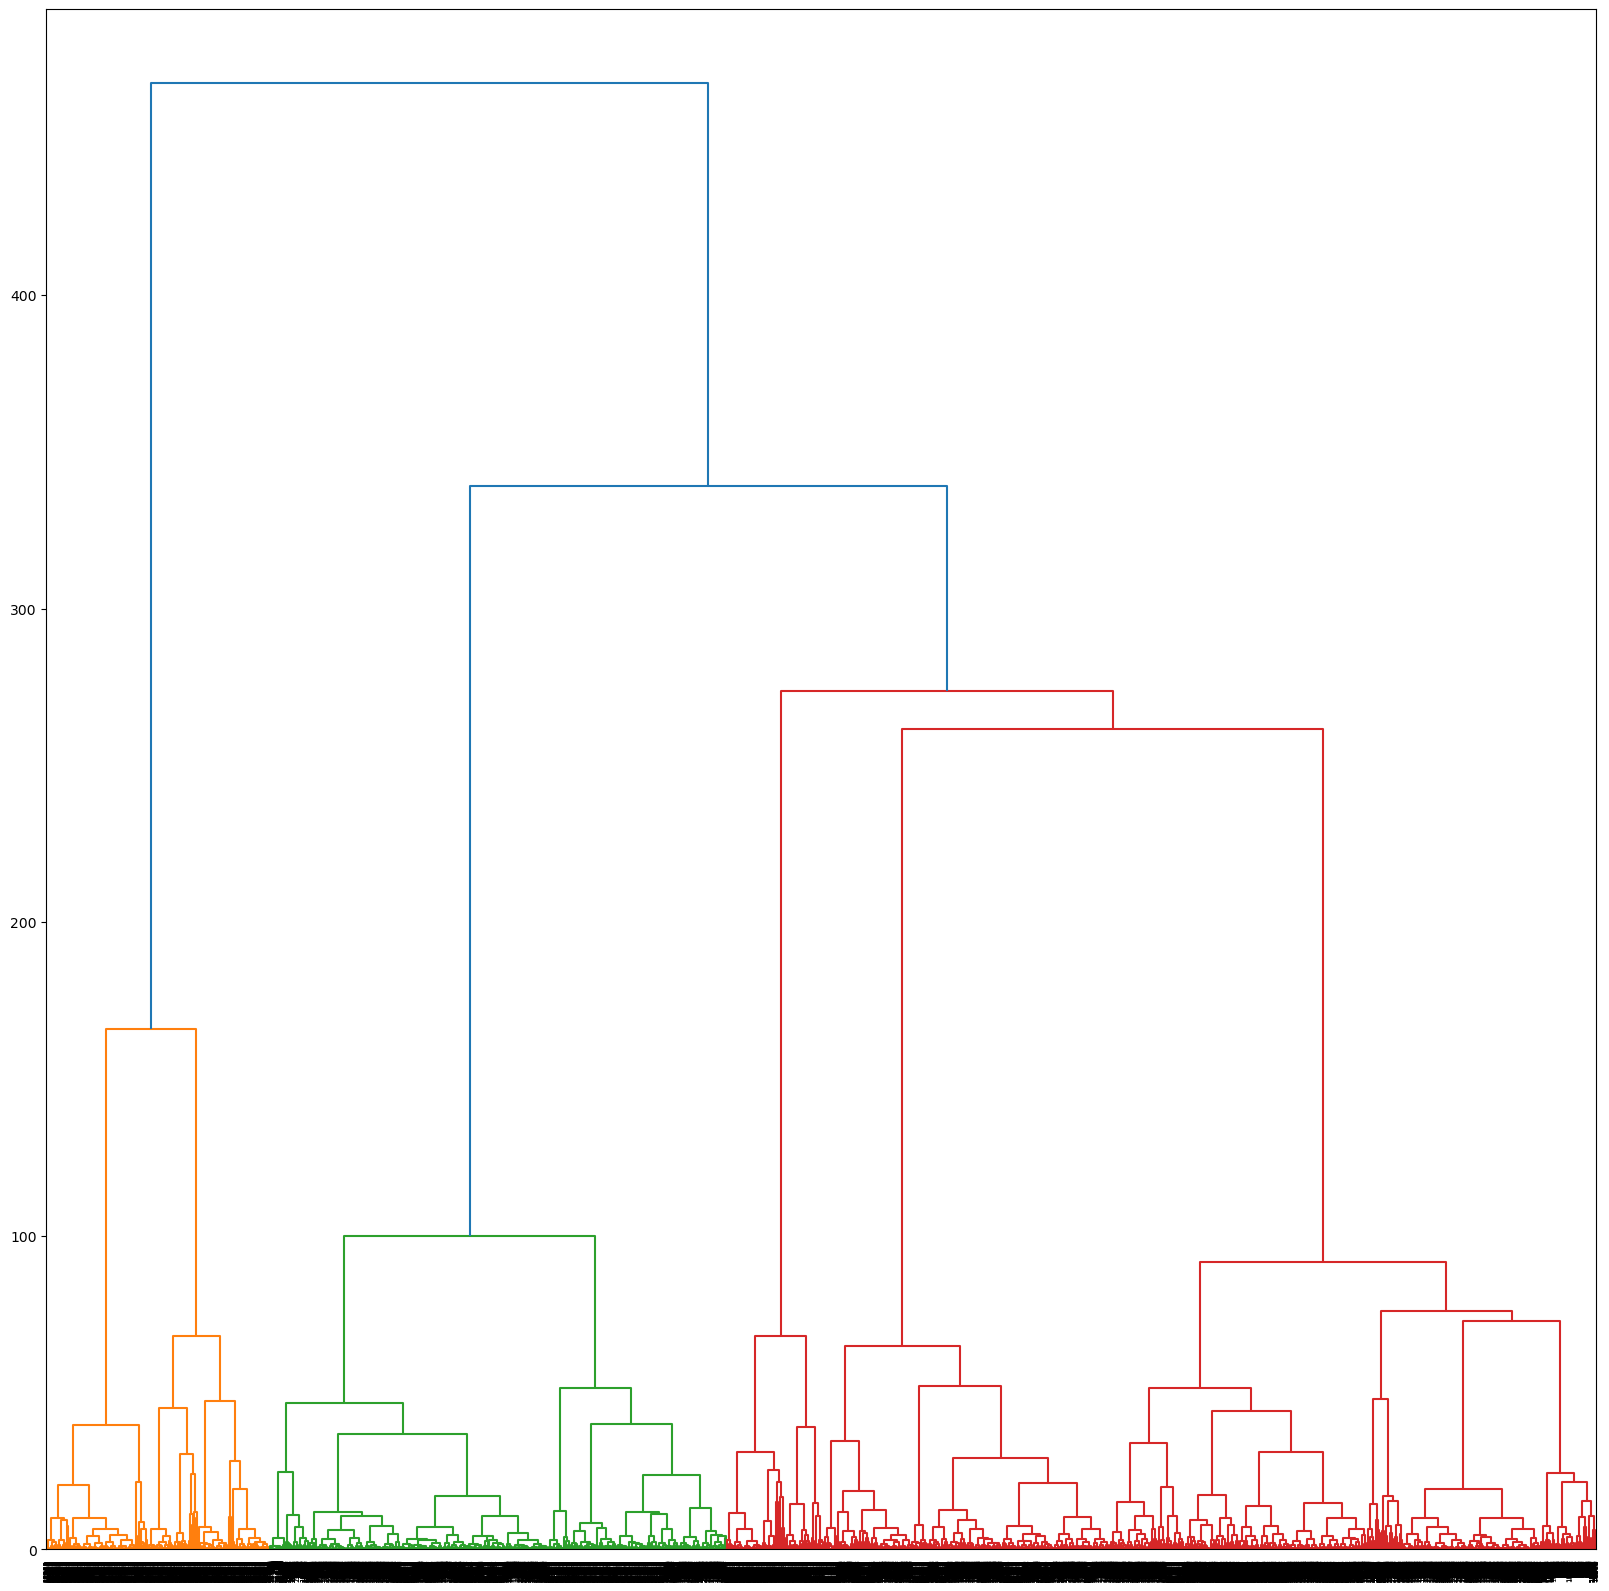

In [28]:
x_full = data_scaled.values
plt.figure(figsize=(20, 20))
Z = sch.dendrogram(sch.linkage(x_full, method = "ward", metric='euclidean'))
plt.show()

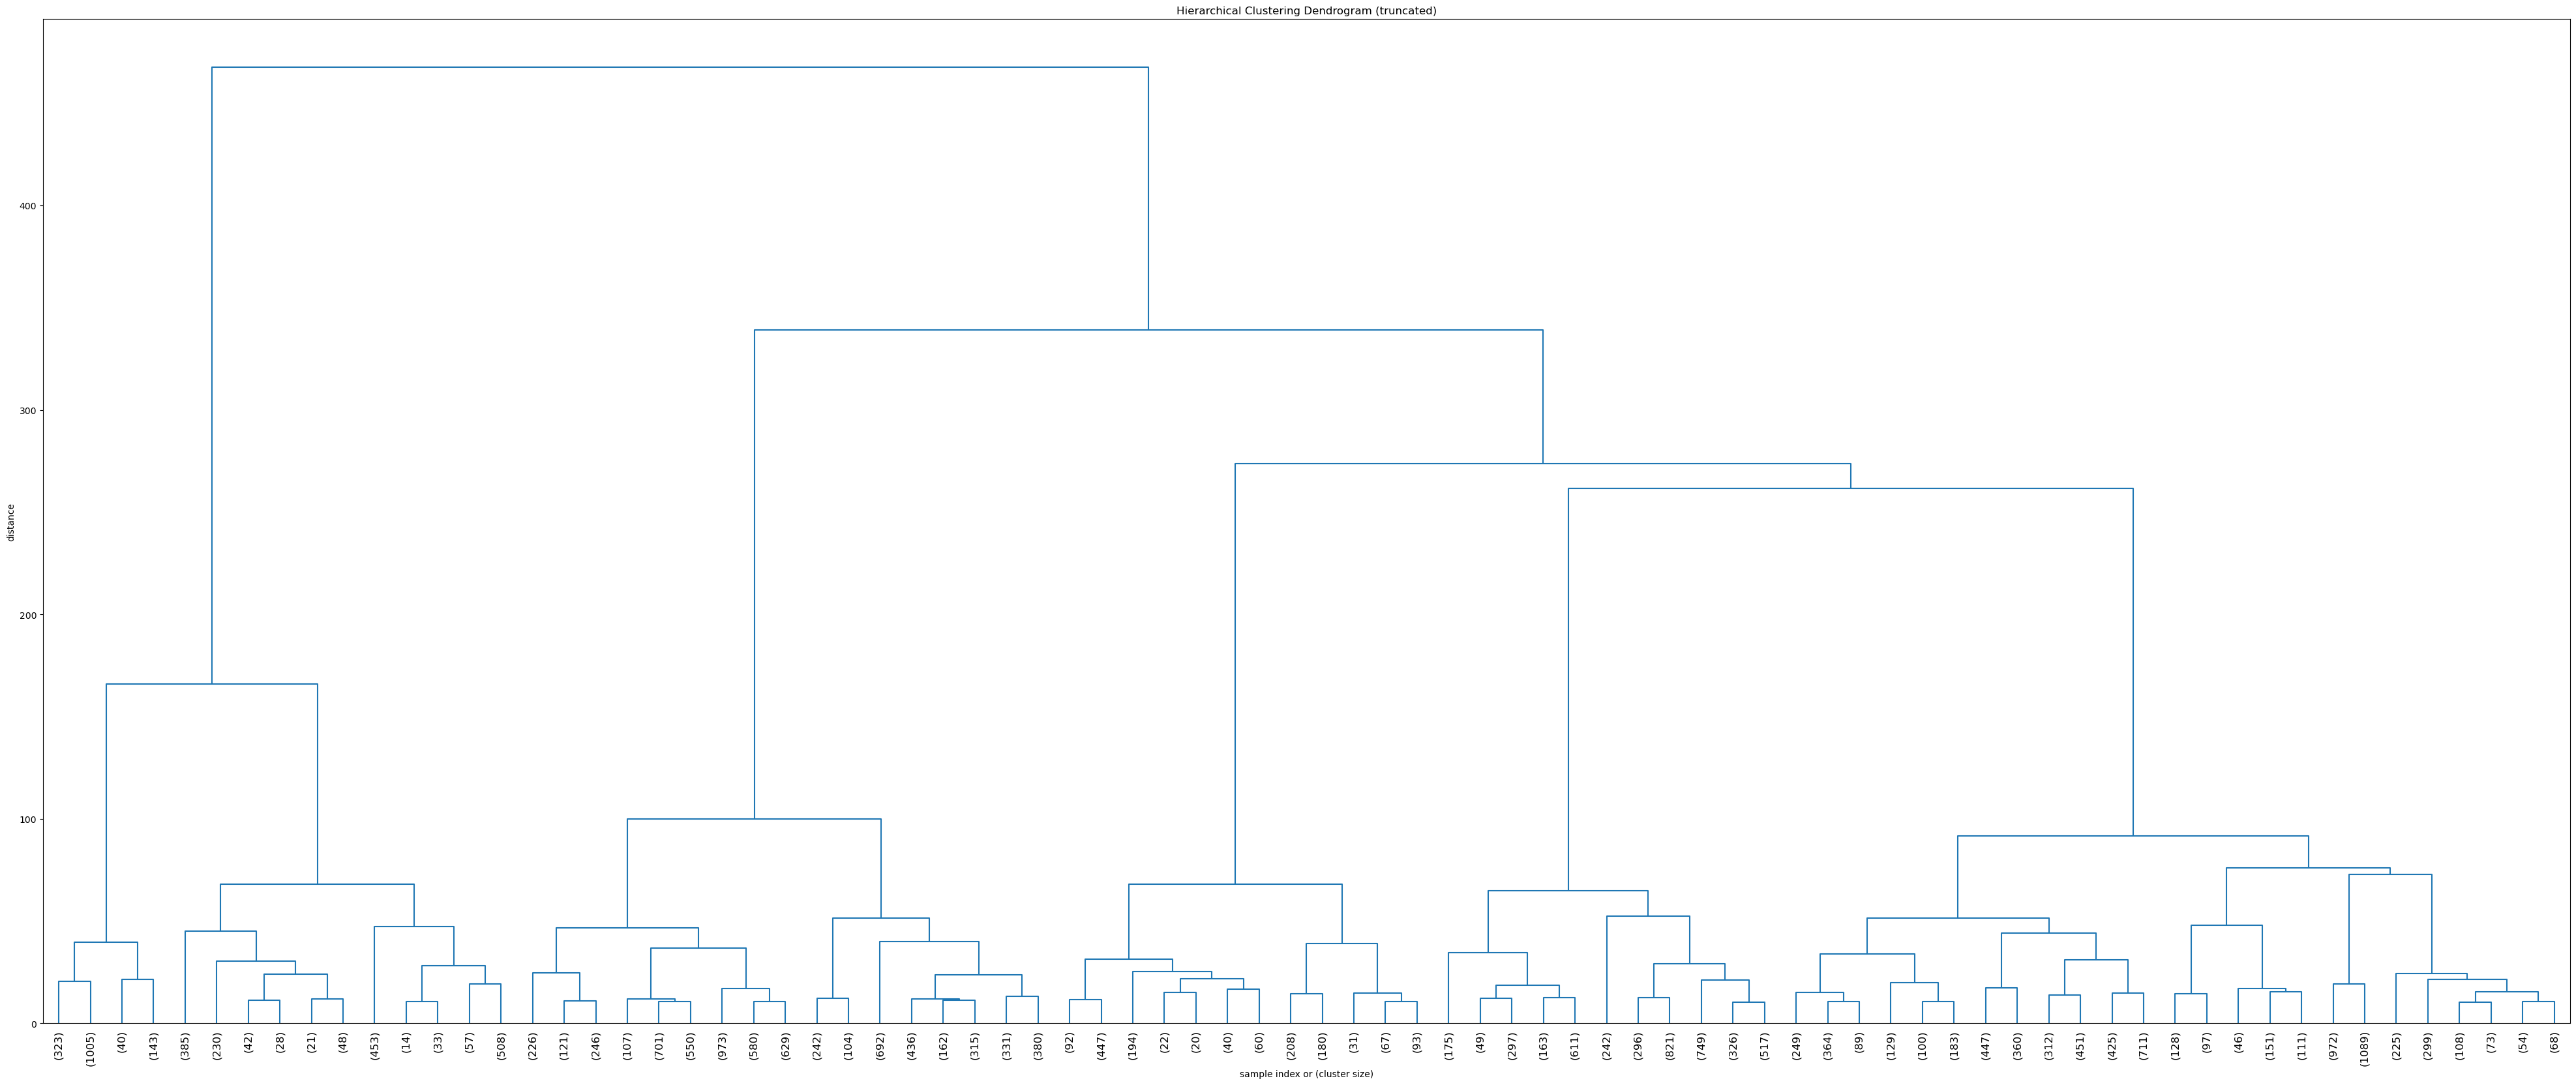

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(50, 20))
Z_Final = linkage(data_scaled, method='ward', metric='euclidean')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_Final,
    truncate_mode='lastp',  
    p=80,  
    leaf_rotation=90,
    leaf_font_size=12,
    color_threshold=10 
)
plt.show()

### Making Elbow plot (up to n=10) and identifying optimum number of clusters for k-means algorithm.

In [29]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score

In [30]:
wss =[] 
a=[1,2,3,4,5,6,7,8,9,10]
sil_score= []
for i in a:
    KM = KMeans(n_clusters=i,random_state=42)
    KM.fit(data_scaled)
    wss.append(KM.inertia_)

In [31]:
for i in a:
    print('The WSS value for',i,'clusters is',wss[i-2])

The WSS value for 1 clusters is 31681.507734362327
The WSS value for 2 clusters is 299858.0000000001
The WSS value for 3 clusters is 190483.6883406083
The WSS value for 4 clusters is 132530.78686918895
The WSS value for 5 clusters is 95029.65455486834
The WSS value for 6 clusters is 60043.584167917325
The WSS value for 7 clusters is 46393.828419562546
The WSS value for 8 clusters is 42505.510849490136
The WSS value for 9 clusters is 36864.19166847205
The WSS value for 10 clusters is 34330.55010982552


Text(0, 0.5, 'WSS')

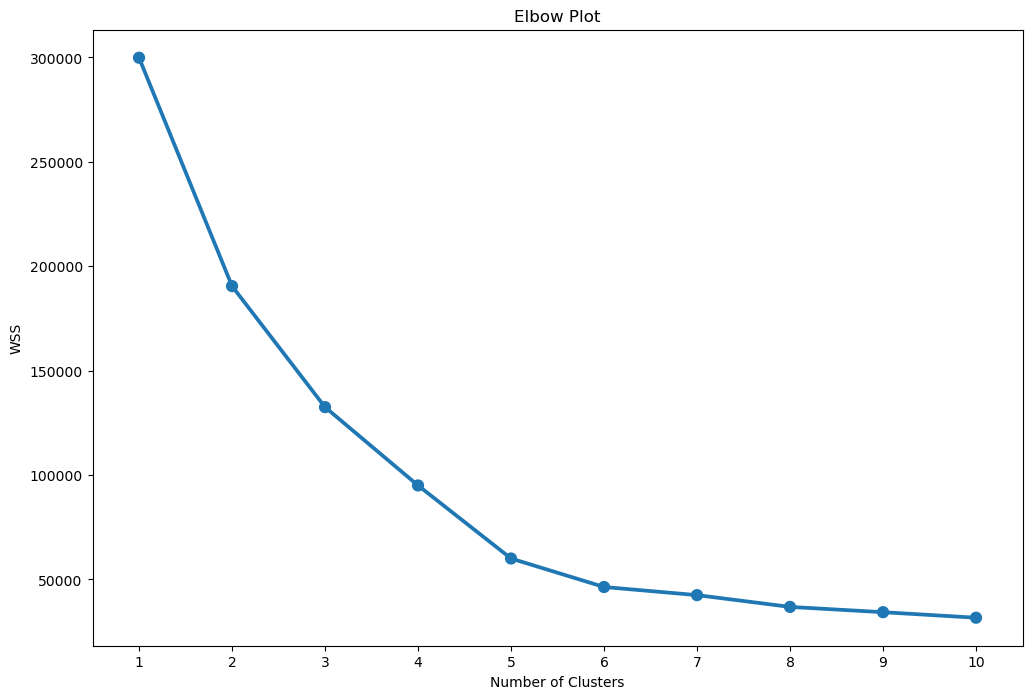

In [32]:
plt.figure(figsize=(12,8))
sns.pointplot(x=a, y=wss)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')

### Printing silhouette scores for up to 10 clusters and identify optimum number of clusters

In [33]:
ss={1:0}
for i in range(2, 11):
 clusterer = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
 y = clusterer.fit_predict(data_scaled)
 s = silhouette_score(data_scaled, y )
 ss[i]=round(s,5)
 print("The Average Silhouette Score for {} clusters is {}.".format(i,round(s,5)))

The Average Silhouette Score for 2 clusters is 0.47368.
The Average Silhouette Score for 3 clusters is 0.39136.
The Average Silhouette Score for 4 clusters is 0.45212.
The Average Silhouette Score for 5 clusters is 0.55659.
The Average Silhouette Score for 6 clusters is 0.57526.
The Average Silhouette Score for 7 clusters is 0.48777.
The Average Silhouette Score for 8 clusters is 0.463.
The Average Silhouette Score for 9 clusters is 0.41463.
The Average Silhouette Score for 10 clusters is 0.46435.


Text(0.5, 0, 'Number of clusters')

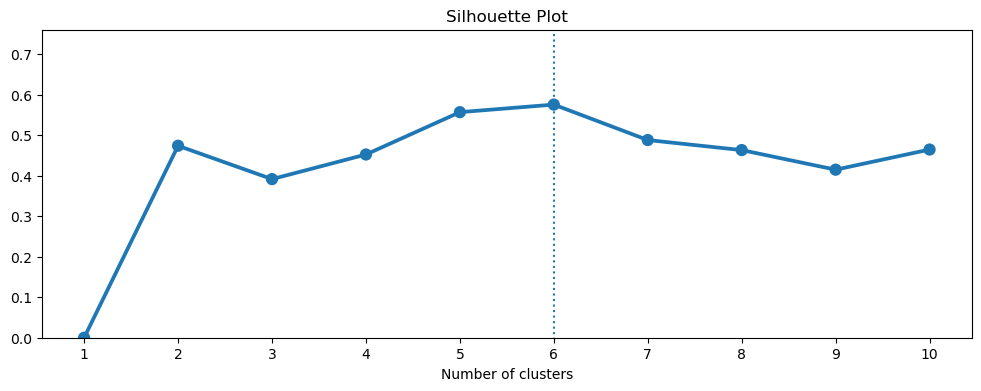

In [34]:
maxkey = [key for key, value in ss.items() if value == max(ss.values())][0]
fig,ax = plt.subplots(figsize=(12,4))
sns.pointplot(list(ss.keys()),list(ss.values()))
plt.vlines(x = maxkey-1,ymax = 0,ymin = 0.75,linestyles = 'dotted')
ax.set(ylim = (0, 0.76))
ax.set_title('Silhouette Plot')
ax.set_xlabel('Number of clusters')

In [35]:
cluster = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
cluster.fit_predict(data_scaled)
labels = cluster.labels_

In [36]:
data['KMEANS_LABELS'] = labels

In [37]:
data.head().T

,0,1,2,3,4
Timestamp,2020-9-2-17,2020-9-2-10,2020-9-1-22,2020-9-3-20,2020-9-4-15
InventoryType,Format1,Format1,Format1,Format1,Format1
Ad - Length,300,300,300,300,300
Ad- Width,250,250,250,250,250
Ad Size,75000,75000,75000,75000,75000
Ad Type,Inter222,Inter227,Inter222,Inter228,Inter217
Platform,Video,App,Video,Video,Web
Device Type,Desktop,Mobile,Desktop,Mobile,Desktop
Format,Display,Video,Display,Video,Video
Available_Impressions,1806,1780,2727,2430,1218


### Profiling the ads based on optimum number of clusters using silhouette score 

In [38]:
data.KMEANS_LABELS.value_counts(1)*100

3    30.321686
1    29.662707
0    19.569930
2     7.612937
5     6.620134
4     6.212607
Name: KMEANS_LABELS, dtype: float64

In [39]:
data.KMEANS_LABELS.value_counts()

3    6994
1    6842
0    4514
2    1756
5    1527
4    1433
Name: KMEANS_LABELS, dtype: int64

In [40]:
data.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,KMEANS_LABELS
count,23066.000000,23066.000000,23066.000000,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000
mean,385.163097,337.896037,96674.468048,2.432044e+06,1.295099e+06,1.241520e+06,10678.518816,2706.625689,0.335123,1924.252331,8.409941,8.396849,0.336678,1.938047
std,233.651434,203.092885,61538.329557,4.742888e+06,2.512970e+06,2.429400e+06,17353.409363,4067.927273,0.031963,3105.238410,9.262048,9.057760,0.341253,1.491045
min,120.000000,70.000000,33600.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.010874,0.000000,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.265107,1.749084,0.089736,1.000000
50%,300.000000,300.000000,72000.000000,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,9.391248,8.371566,0.139347,2.000000
75%,720.000000,600.000000,84000.000000,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,13.470571,13.042018,0.546242,3.000000
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,200.000000,715.000000,7.264000,5.000000


In [41]:
clust_profile = data
clust_profile = clust_profile.groupby('KMEANS_LABELS').mean()
clust_profile['freq'] = data.KMEANS_LABELS.value_counts().sort_index()
np.round(clust_profile,2).T

KMEANS_LABELS,0,1,2,3,4,5
Ad - Length,695.17,149.55,316.28,418.07,142.18,680.94
Ad- Width,316.80,558.21,254.54,157.14,571.18,117.92
Ad Size,213586.18,75690.15,78364.78,56445.35,75625.96,70159.76
Available_Impressions,279059.43,46582.25,6583616.27,2070385.26,843405.75,17858169.00
Matched_Queries,147665.19,28661.60,3680737.02,1020575.04,591156.63,9536142.81
Impressions,126758.60,21257.39,3600777.01,980987.72,498760.11,9181756.42
Clicks,13904.89,2947.20,8548.28,3451.11,68157.27,17394.94
Spend,1224.16,318.92,4867.49,1763.33,7234.73,15373.73
Fee,0.35,0.35,0.32,0.35,0.29,0.24
Revenue,797.23,208.48,3326.64,1157.98,5205.55,11761.38


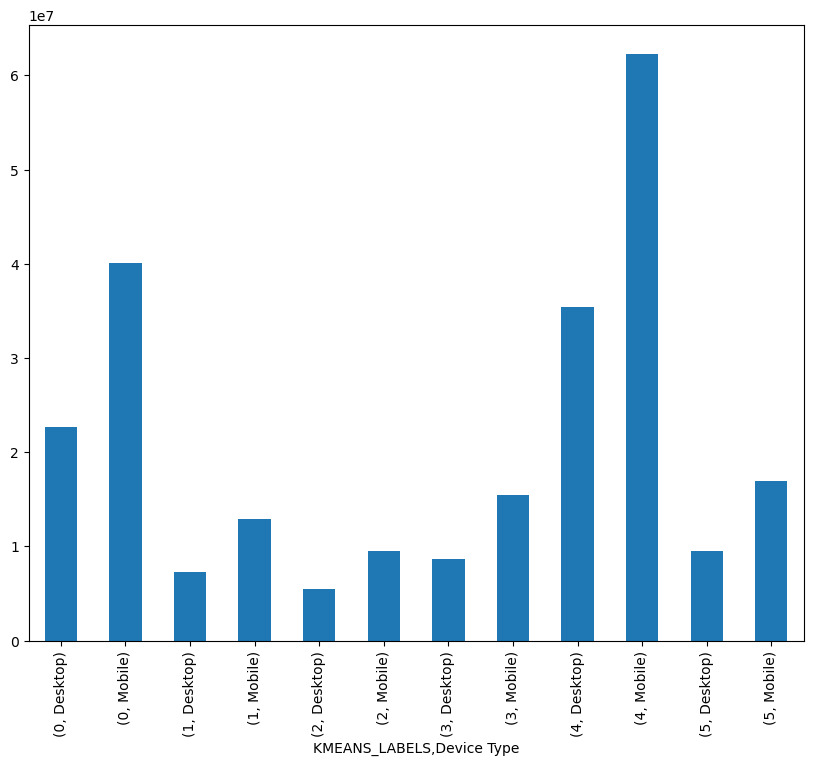

In [42]:
data.groupby(['KMEANS_LABELS','Device Type']).sum()['Clicks'].plot(kind = 'bar',figsize=(10,8));

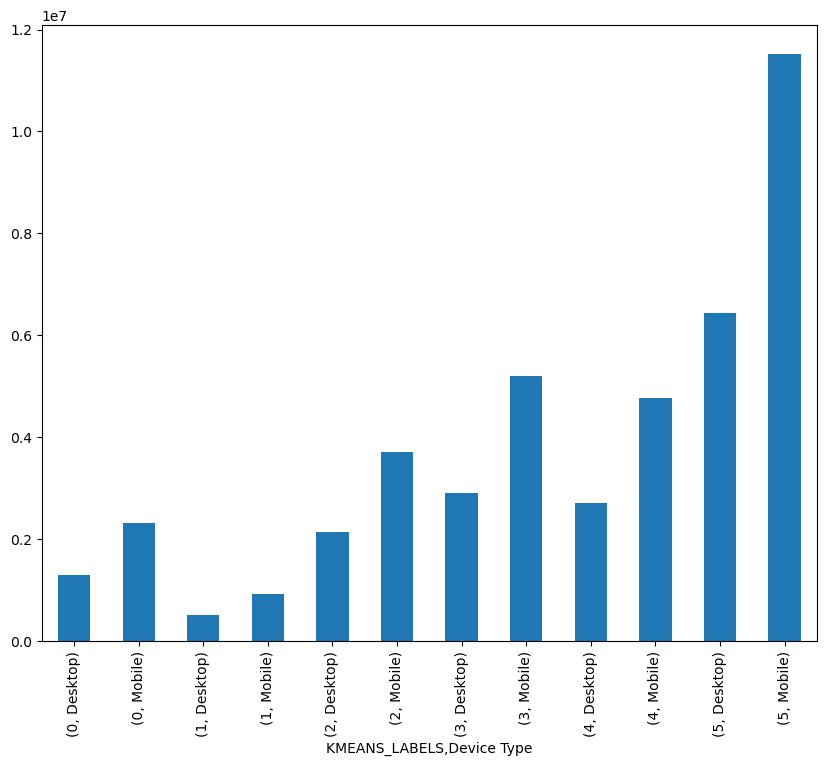

In [43]:
data.groupby(['KMEANS_LABELS','Device Type']).sum()['Revenue'].plot(kind = 'bar',figsize=(10,8));

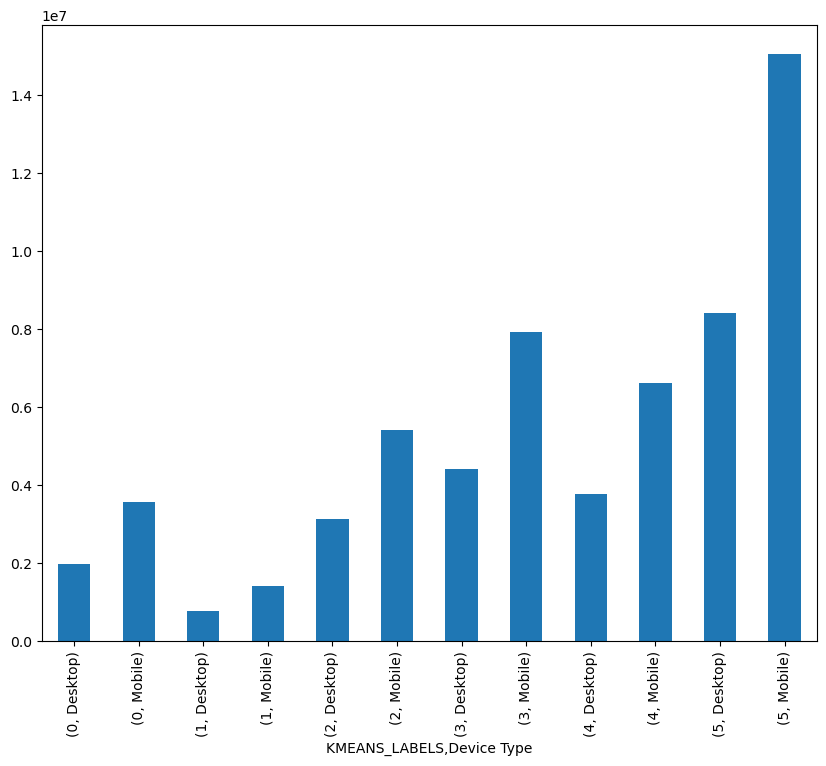

In [44]:
data.groupby(['KMEANS_LABELS','Device Type']).sum()['Spend'].plot(kind = 'bar',figsize=(10,8));

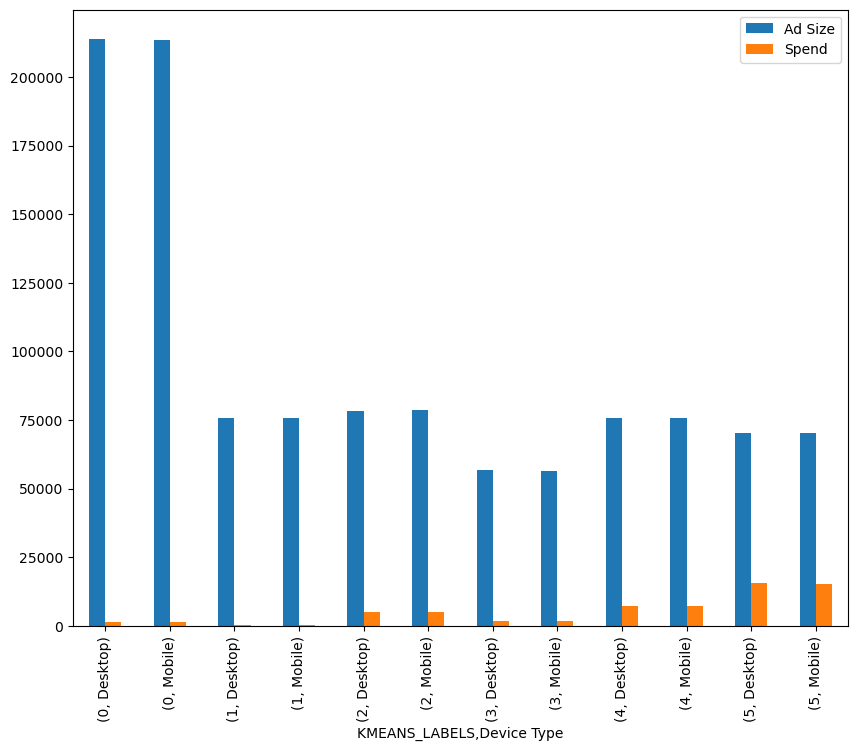

In [45]:
data.groupby(['KMEANS_LABELS','Device Type']).mean()[['Ad Size','Spend']].plot(kind = 'bar',figsize=(10,8));

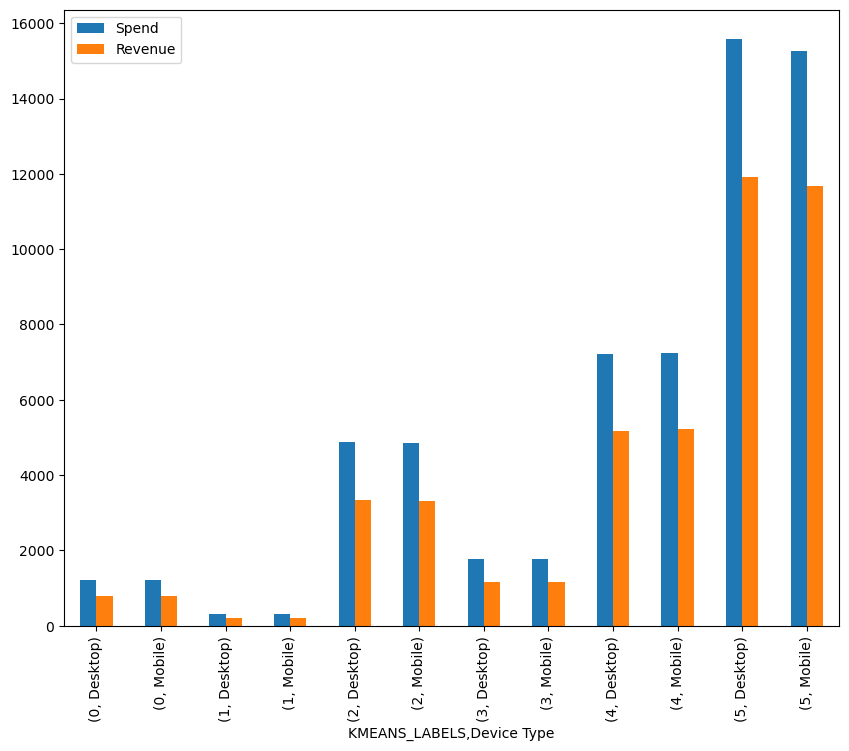

In [46]:
data.groupby(['KMEANS_LABELS','Device Type']).mean()[['Spend','Revenue']].plot(kind = 'bar',figsize=(10,8));

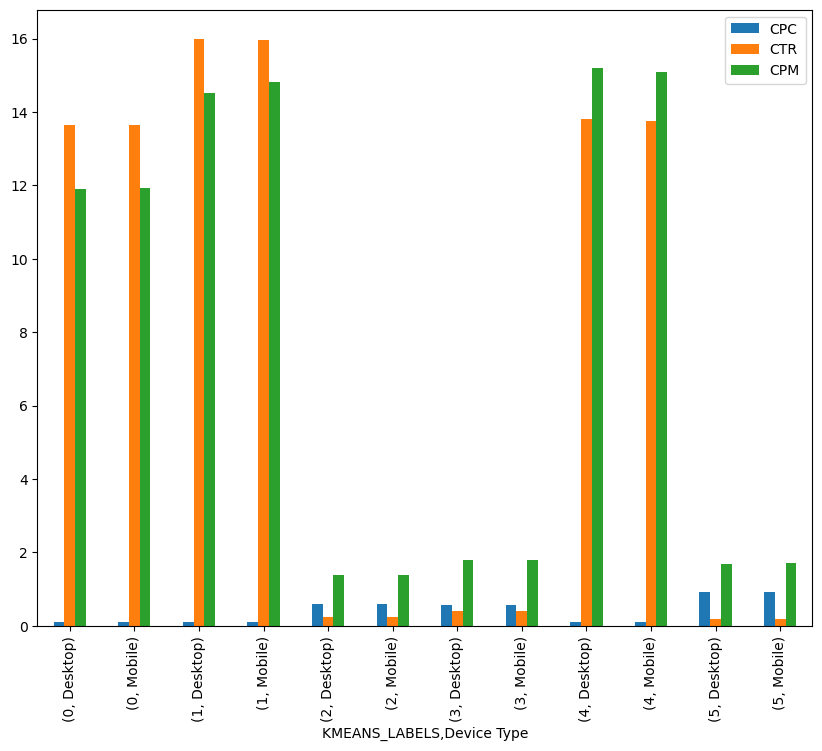

In [47]:
data.groupby(['KMEANS_LABELS','Device Type']).mean()[['CPC','CTR','CPM']].plot(kind = 'bar',figsize=(10,8));

In [48]:
silhouette_samples(data_scaled,labels).min()

-0.08027416318517626